In [1]:
from dotenv import load_dotenv
import openai
import os
from openai import AzureOpenAI
from IPython.display import display, HTML, JSON, Markdown, Image
import base64 

load_dotenv()
AZURE_OPENAI_ENDPOINT=os.getenv("AISTUDIO_AZURE_OPENAI_ENDPOINT")
AZURE_OPENAI_GPT4o_DEPLOYMENT=os.getenv("AI_STUDIO_AZURE_OPENAI_GPT4o_DEPLOYMENT")
AZURE_OPENAI_API_VERSION="2024-02-01"
AZURE_OPENAI_KEY=os.getenv("AISTUDIO_AZURE_OPENAI_KEY")

client = openai.AzureOpenAI(
        azure_endpoint=AZURE_OPENAI_ENDPOINT,
        api_key=AZURE_OPENAI_KEY,
        api_version=AZURE_OPENAI_API_VERSION
)

In [2]:
import textwrap

def call_openAI(text):
    response = client.chat.completions.create(
        model=AZURE_OPENAI_GPT4o_DEPLOYMENT,
        messages = text,
        temperature=0.0
    )
    return response.choices[0].message.content

def prettyprint(text: str) -> str:
    print(textwrap.fill(text, 60))

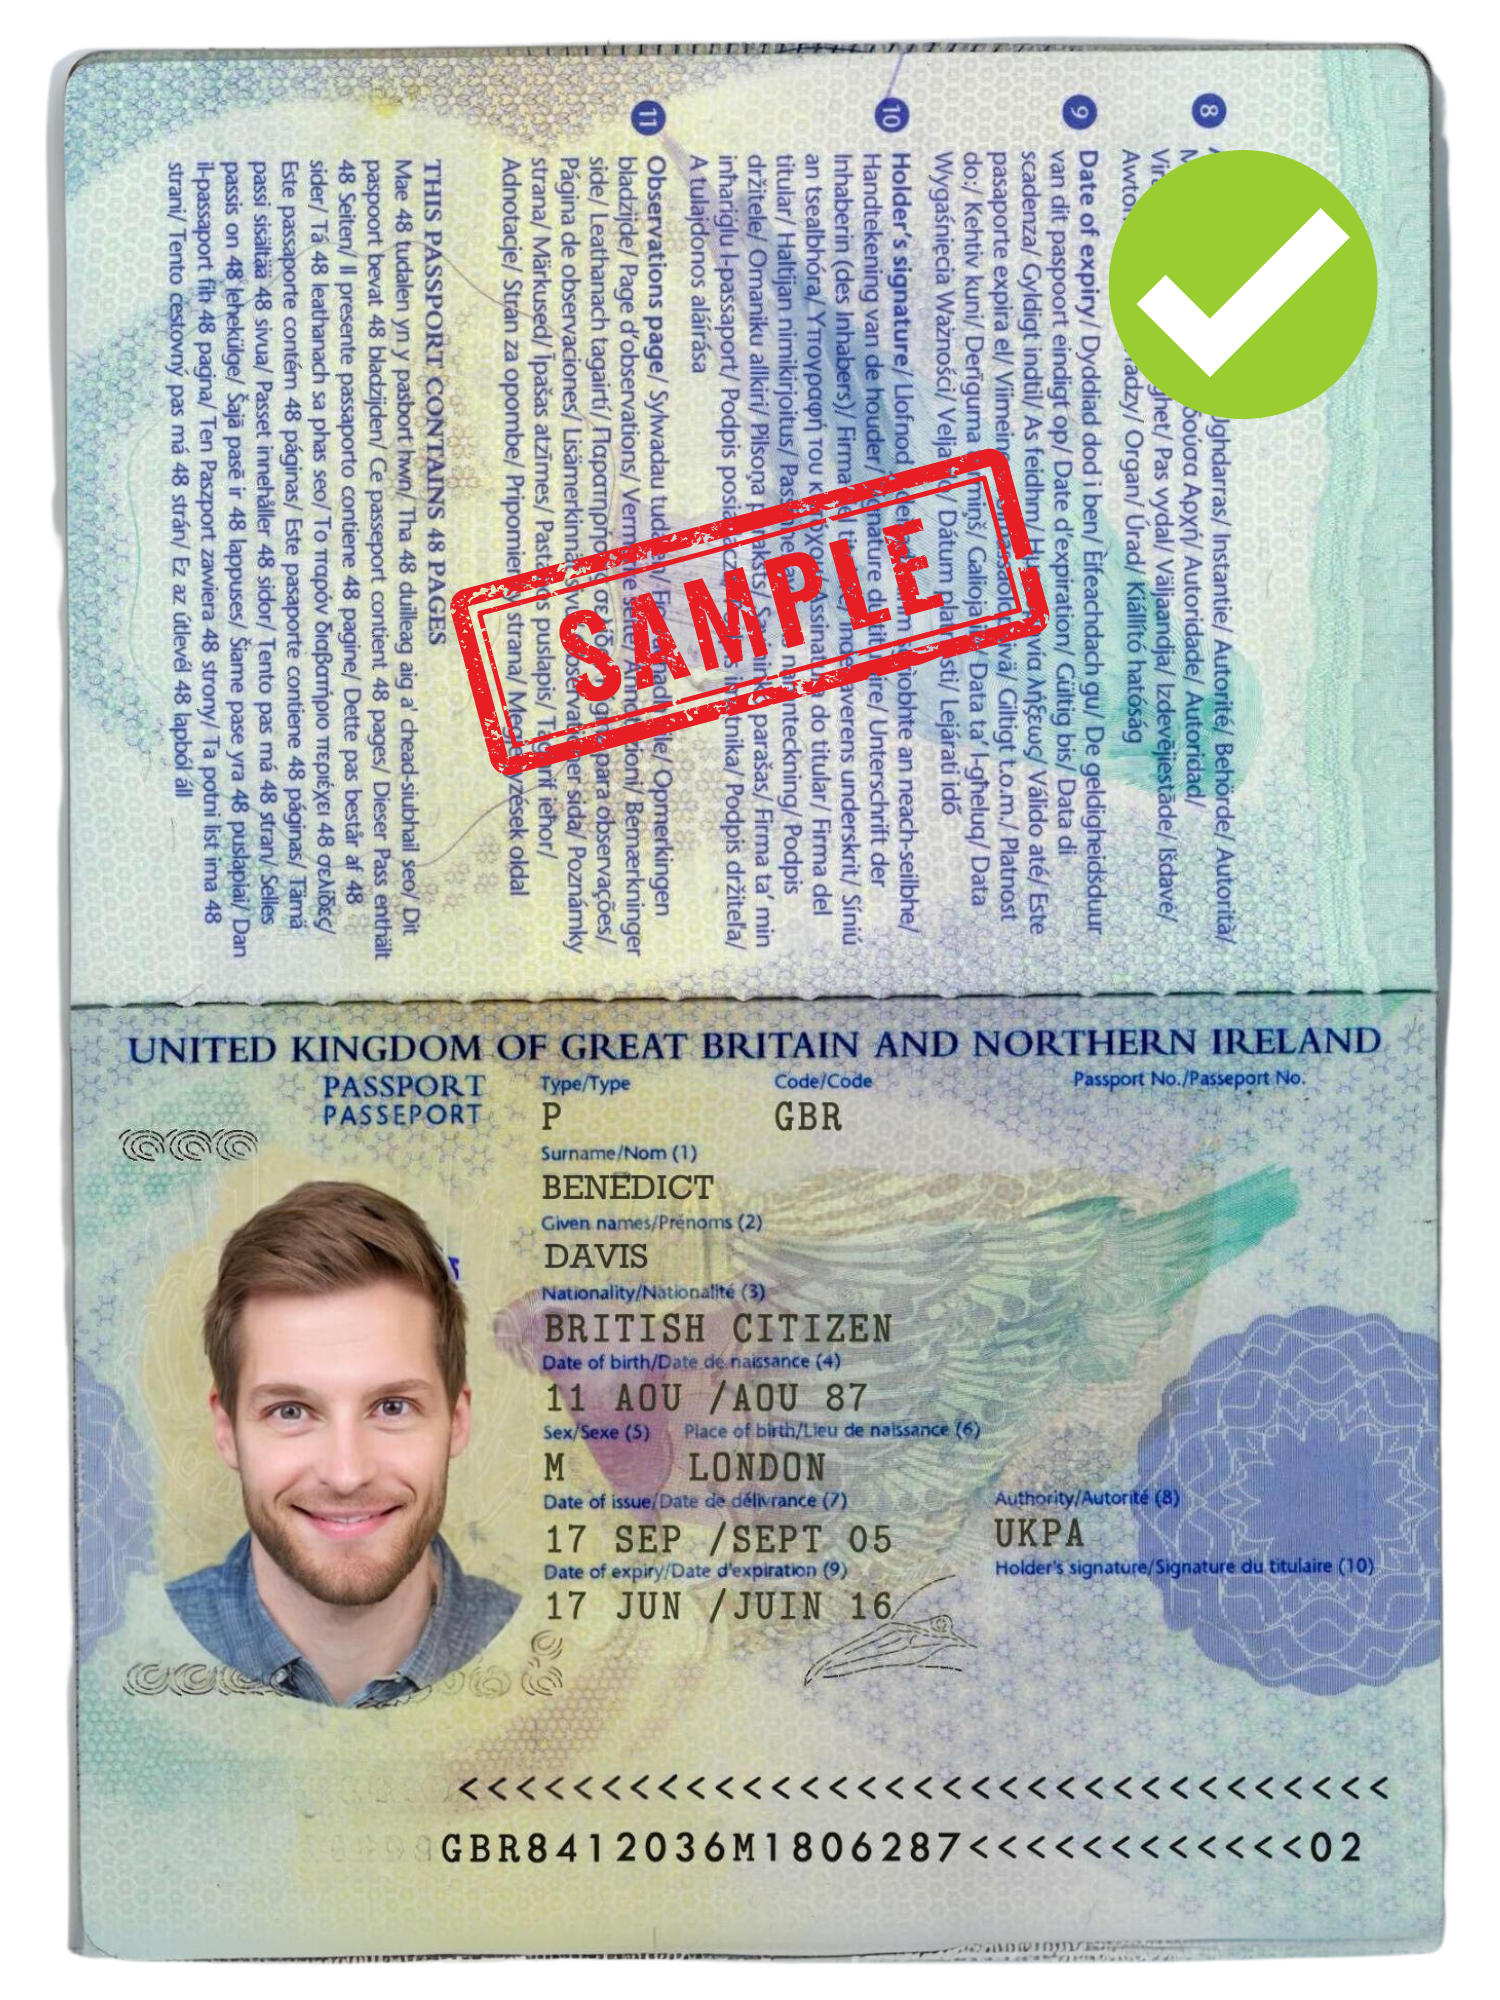

In [3]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

IMAGE_PATH = "./data/passport-sample.png"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [5]:

messages=[
    {"role": "system", "content": """You are a helpful assistant that responds to users questions.
    You will respond with entities you have extracted from the text as a JSON object.
    Here is an example of your output format:{name:'',surname:'',passport_number:'',date_of_birth:''}"""},
    {"role": "user", "content": [
        {"type": "text", "text": "what is the name of the person in the image?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
prettyprint(result)

```json {   "name": "BENEDICT",   "surname": "DAVIS",
"passport_number": "GBR8412036M1806287",   "date_of_birth":
"11 AUG 87" } ```
